In [15]:
library(patchwork)
library(ggplot2)
library(magick)
library(tidytext)
library(SingleCellExperiment)
library(tidyHeatmap)
library(dplyr)
library(tidyr)
library(plotgardener)
library(ggplot2)
library(ggrepel)
library(gridExtra)
source('./ABCA7lof2/plotting.r')

In [16]:
cols = c('grey', 'red')
names(cols) = c('Con', 'LoF')
colors = readRDS('./processed_data//Cell_group_colors.rds')

<u>**Figure 1**</u>
<a name="F1"></a>

In [ ]:
### make M-R more visible
### order S

In [361]:
colData = read.csv('./processed_data/single_cell/colData.csv')
coords = colData[,c('x', 'y', 'ABCA7LoF', 'projid', 'leiden_clusters', 'annotations2', 'gaussian_liklihood')]
coords$ABCA7LoF = ifelse(coords$ABCA7LoF==1, 'LoF', 'Con')

coords = read.csv('../ABCA7lof//processed_data//for_plotting/umap_coords.csv', row.names=1)


In [6]:
# sce = readRDS('./processed_data/single_cell/sce.rds')
# coords$ABCA7 = logcounts(sce)['ABCA7',]

In [362]:
# plot cartoon
abca7_gene = image_ggplot(image_read('../ABCA7lof/svgs/abca7_gene.png'))
cohort_cartoon = image_ggplot(image_trim(image_read('../ABCA7lof/svgs/cohort_cartoon.png')))

In [363]:
abca7_expression = plot_coords_by_gene(coords, 'x', 'y', 'ABCA7', 'node_centrality', low='white', high='red')

In [364]:
# plot cells
size=4
cells_plot = plot_coords_by_grp(coords, 'x', 'y', 'celltype', 'node_centrality', colors)+annotate(geom="text", x=-2, y=13, label="Excitatory Neurons",color=colors['Ex'], size=size, fontface='italic')+
annotate(geom="text", x=9, y=-1, label="Oligodendrocytes",color=colors['Oli'], size=size, fontface='italic')+
annotate(geom="text", x=7, y=-14, label="Astrocytes",color=colors['Ast'], size=size, fontface='italic')+
annotate(geom="text", x=4, y=10, label="Inhibitory Neurons",color=colors['In'], size=size, fontface='italic')+
annotate(geom="text", x=12, y=3, label="Microglia",color=colors['Mic'], size=size, fontface='italic')+
annotate(geom="text", x=2, y=-5, label="OPCs",color=colors['Opc'], size=size, fontface='italic')+
annotate(geom="text", x=-7, y=-11, label="Vascular Cells",color=colors['Endo'], size=size, fontface='italic')

In [365]:
# plot LoF
size=4
coords$LoF = ifelse(coords$LoF=='LOF', 'LoF', 'Con')
lof_plot = plot_coords_by_grp(coords, 'x', 'y', 'LoF', 'node_centrality', cols)#+annotate(geom="text", x=-2, y=13, label="Excitatory Neurons",color=colors['Ex'], size=size, fontface='italic')

In [387]:
ex_u = image_ggplot(image_border(image_trim((image_read_pdf('./pdf_figures/Exumap.pdf'))),  "grey", "10x10"))
in_u = image_ggplot(image_border(image_trim((image_read_pdf('./pdf_figures/Inumap.pdf'))),  "grey", "10x10"))
ast_u = image_ggplot(image_border(image_trim((image_read_pdf('./pdf_figures/Astumap.pdf'))),  "grey", "10x10"))
mic_u = image_ggplot(image_border(image_trim((image_read_pdf('./pdf_figures/Micumap.pdf'))),  "grey", "10x10"))
oli_u = image_ggplot(image_border(image_trim((image_read_pdf('./pdf_figures/Oliumap.pdf'))),  "grey", "10x10"))
opc_u = image_ggplot(image_border(image_trim((image_read_pdf('./pdf_figures/Opcumap.pdf'))),  "grey", "10x10"))
overview = image_ggplot(image_trim(image_read_pdf('./pdf_figures/cluster_overview.pdf')))
overview1 = image_ggplot(image_trim(image_read_pdf('./pdf_figures//umap_exp_overview.pdf')))

In [367]:
ex_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Exumap_clust.pdf'))),  "black", "10x10"))
in_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Inumap_clust.pdf'))),  "black", "10x10"))
ast_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Astumap_clust.pdf'))),  "black", "10x10"))
mic_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Micumap_clust.pdf'))),  "black", "10x10"))
oli_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Oliumap_clust.pdf'))),  "black", "10x10"))
opc_uc = image_ggplot(image_border(((image_read_pdf('./pdf_figures/Opcumap_clust.pdf'))),  "black", "10x10"))

In [368]:
legend = image_ggplot((image_read('./pdf_figures/legend.png')))

In [369]:
ex_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsEx.pdf')))
in_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsIn.pdf')))
ast_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsAst.pdf')))
mic_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsMic.pdf')))
oli_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsOli.pdf')))
opc_b = image_ggplot((image_read_pdf('./pdf_figures/cluster_barsOpc.pdf')))

In [394]:
options(repr.plot.width=12, repr.plot.height=11)

row1 = ((cohort_cartoon / abca7_gene) | (cells_plot)) + plot_layout(widths=c(2,.8))
row2 = (ex_u | in_u | ast_u) / (mic_u |oli_u | opc_u)
fig1 = (row1/row2) + plot_layout(heights=c(1,2.7)) + plot_annotation(tag_levels = 'A', title='Figure 1')

png 
  2

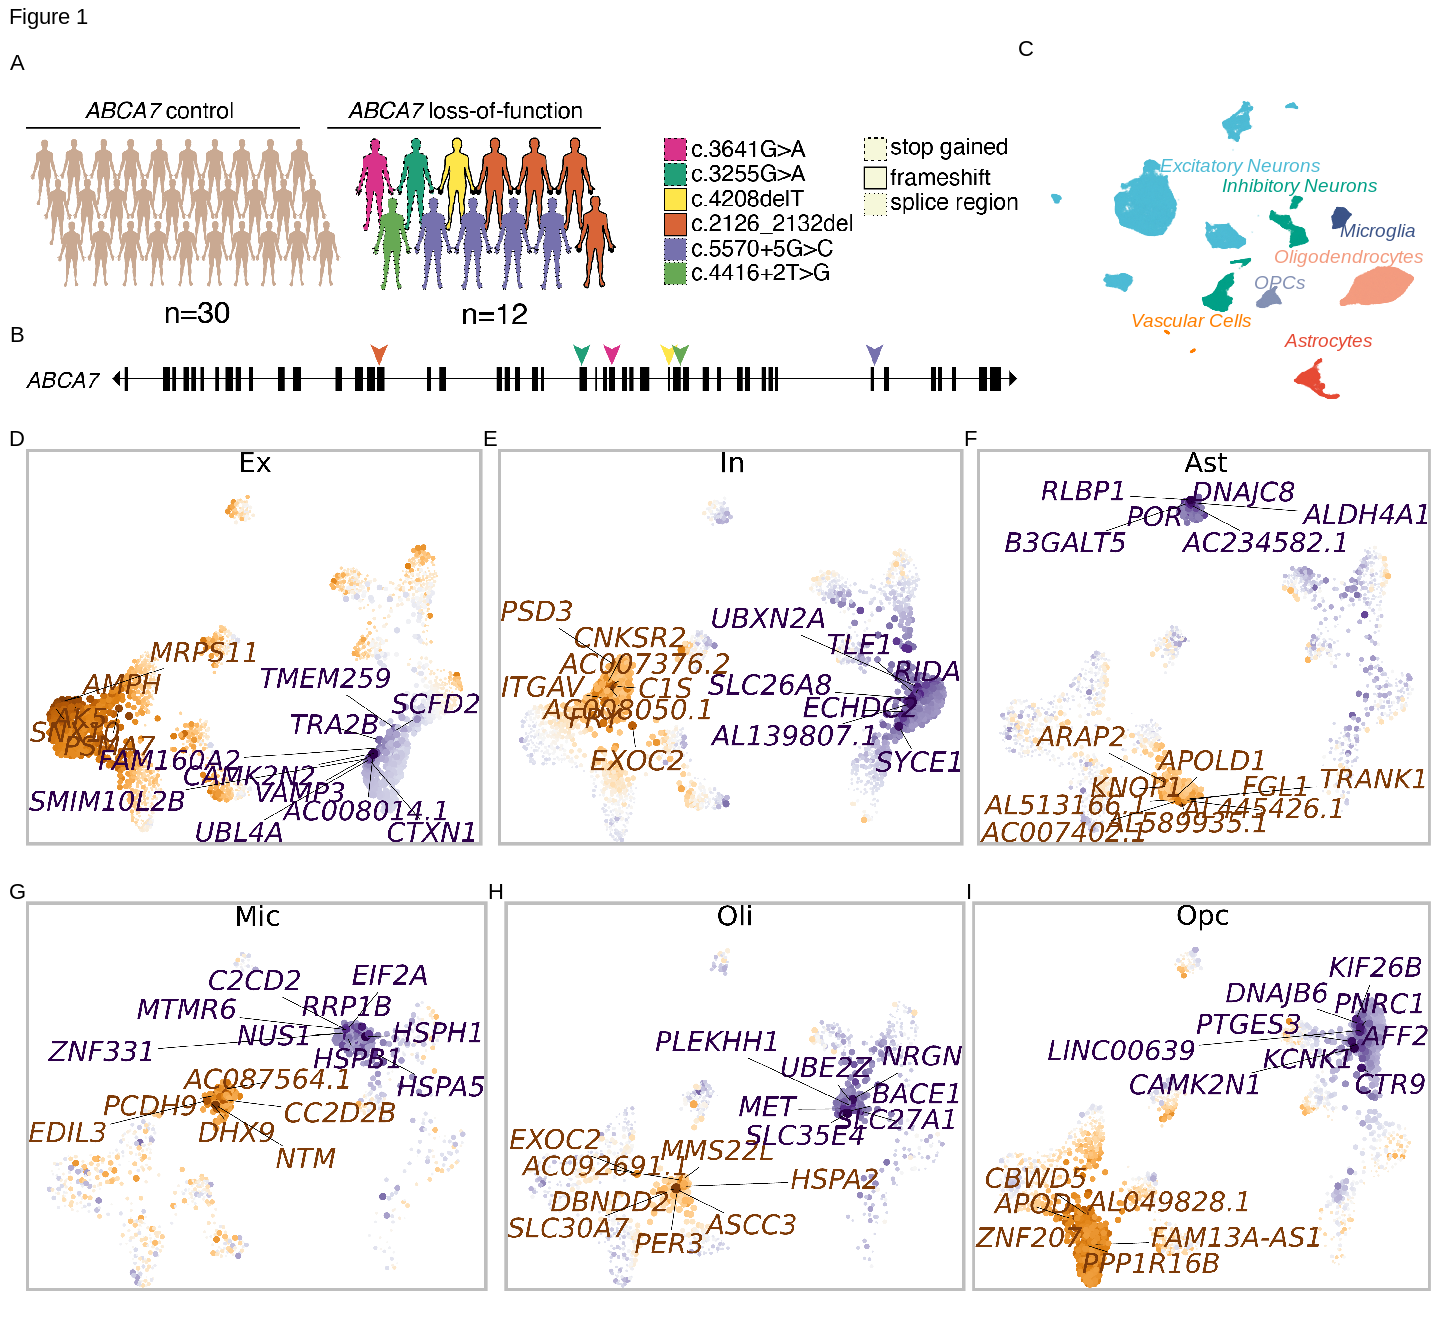

In [395]:
pdf('./pdf_figures/Figure_1.pdf', width=12, height=11)
fig1
dev.off()
fig1

<u>**Figure 2**</u>
<a name="F3"></a>

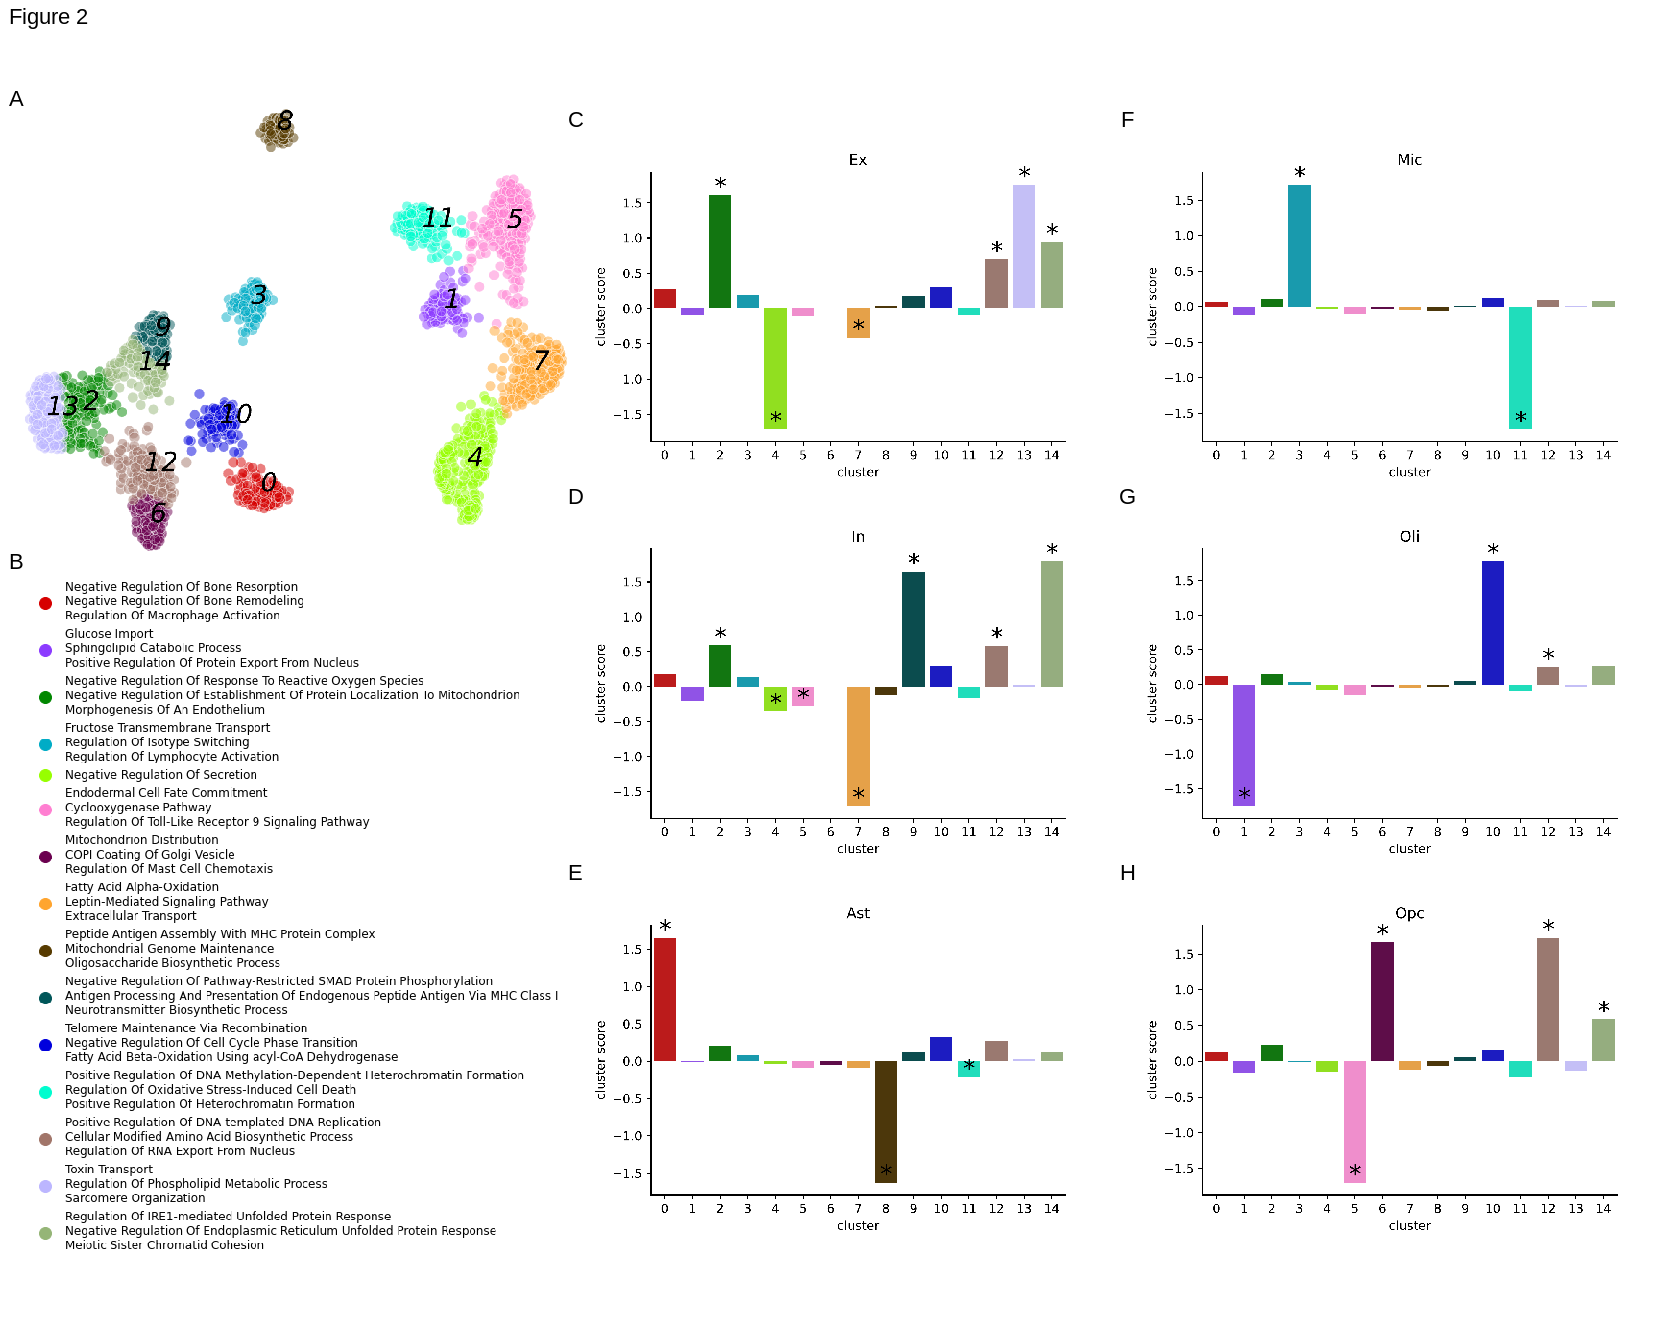

In [406]:
options(repr.plot.width=14, repr.plot.height=11)

bar = (ex_b / in_b / ast_b) | (mic_b / oli_b / opc_b)
fig2 = ((overview/legend)|bar) + plot_layout(widths=c(1,2))+ plot_annotation(tag_levels = 'A', title='Figure 2')
fig2

In [409]:
pdf('./pdf_figures/Figure_2.pdf', width=14, height=11)
fig2
dev.off()


png 
  2

In [408]:

# row2 = (ex_u / in_u / ast_u / mic_u / oli_u / opc_u)
# bar = ex_b / in_b / ast_b / mic_b / oli_b / opc_b

# options(repr.plot.width=12, repr.plot.height=18)
# fig1 = (row1/((row2|((overview/legend/row3)+plot_layout(heights=c(.5,1,1)))|bar)+plot_layout(widths=c(1,2,1.2)))) + plot_layout(heights=c(1,5))+ plot_annotation(tag_levels = 'A', title='Figure 1')

# pdf('./pdf_figures/Figure_1.pdf', width=12, height=18)
# fig1
# dev.off()
# fig1

In [6]:
all_paths = readRDS('../ABCA7lof/processed_data/single_cell_data//analysis_input_data_nov10.rds')

In [1]:
degs = readRDS('./processed_data/single_cell/pseudobulk_degs.rds')

In [4]:
degs$degs_all$Ex$res['JAK2',]

,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
JAK2,0.251006,6.917032,2.28365,0.03021615,0.9902329,-3.554326


In [3]:
all_data = readRDS('./processed_data/single_cell/stats_input_data.rds')

In [11]:
df = as.data.frame(unique(unname(unlist(all_data$expressed10))))
colnames(df)= 'ten_percent_expressed'
write.csv(df, './processed_data/single_cell/10_percent_expressed.csv')

<u>**Figure 3**</u>
<a name="F3"></a>

In [410]:
### Show ABCA7 projection A
### show detection rate B
### Show LE clusters colored by cluster C
### Shoe LE clusters colored by fold change D
### Show cluster summary score & pathway name E

In [541]:
clusters = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex.png')))
scores = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_scores.png')))
names = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names0.png')))
names1 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names1.png')))
names2 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names2.png')))
names3 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names3.png')))
names4 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names4.png')))
names5 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names5.png')))
names6 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names6.png')))
names7 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names7.png')))
#names8 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names8.png')))
#names9 = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust_ex_names9.png')))

In [542]:
bars = image_ggplot((image_read('./pdf_figures/ex_clust_bars.png')))

In [543]:
options(repr.plot.width=10, repr.plot.height=1.4)
#row = (((names9 | names4) / (names7 |names8) /(names3|names5)/ (names | names2) / (names6|names1)))#/bars) + plot_layout(heights=c(1,1,1,1,1,1,2))
row = ((names | names1) / (names2 | names3) / (names4|names5)/ (names6|names7))

In [544]:
coords = read.csv('../ABCA7lof//processed_data//for_plotting/umap_coords.csv', row.names=1)

abca7_expression = plot_coords_by_gene(coords, 'x', 'y', 'ABCA7', 'node_centrality', low='white', high='seagreen')



In [545]:
all_data = readRDS('./processed_data/single_cell/stats_input_data.rds')

In [546]:
x = all_data$det.rate.celltype['ABCA7',]
x = x[order(-1*x)]
x = as.data.frame(x)
x$cell = factor(rownames(x), levels = rownames(x))

p<-ggplot(data=x, aes(x=cell, y=x, fill = cell)) +
  geom_bar(stat="identity") + theme_classic() + scale_fill_manual(values = colors[x$cell]) + ylab('fraction of cells where counts > 0') + xlab('')


png 
  2

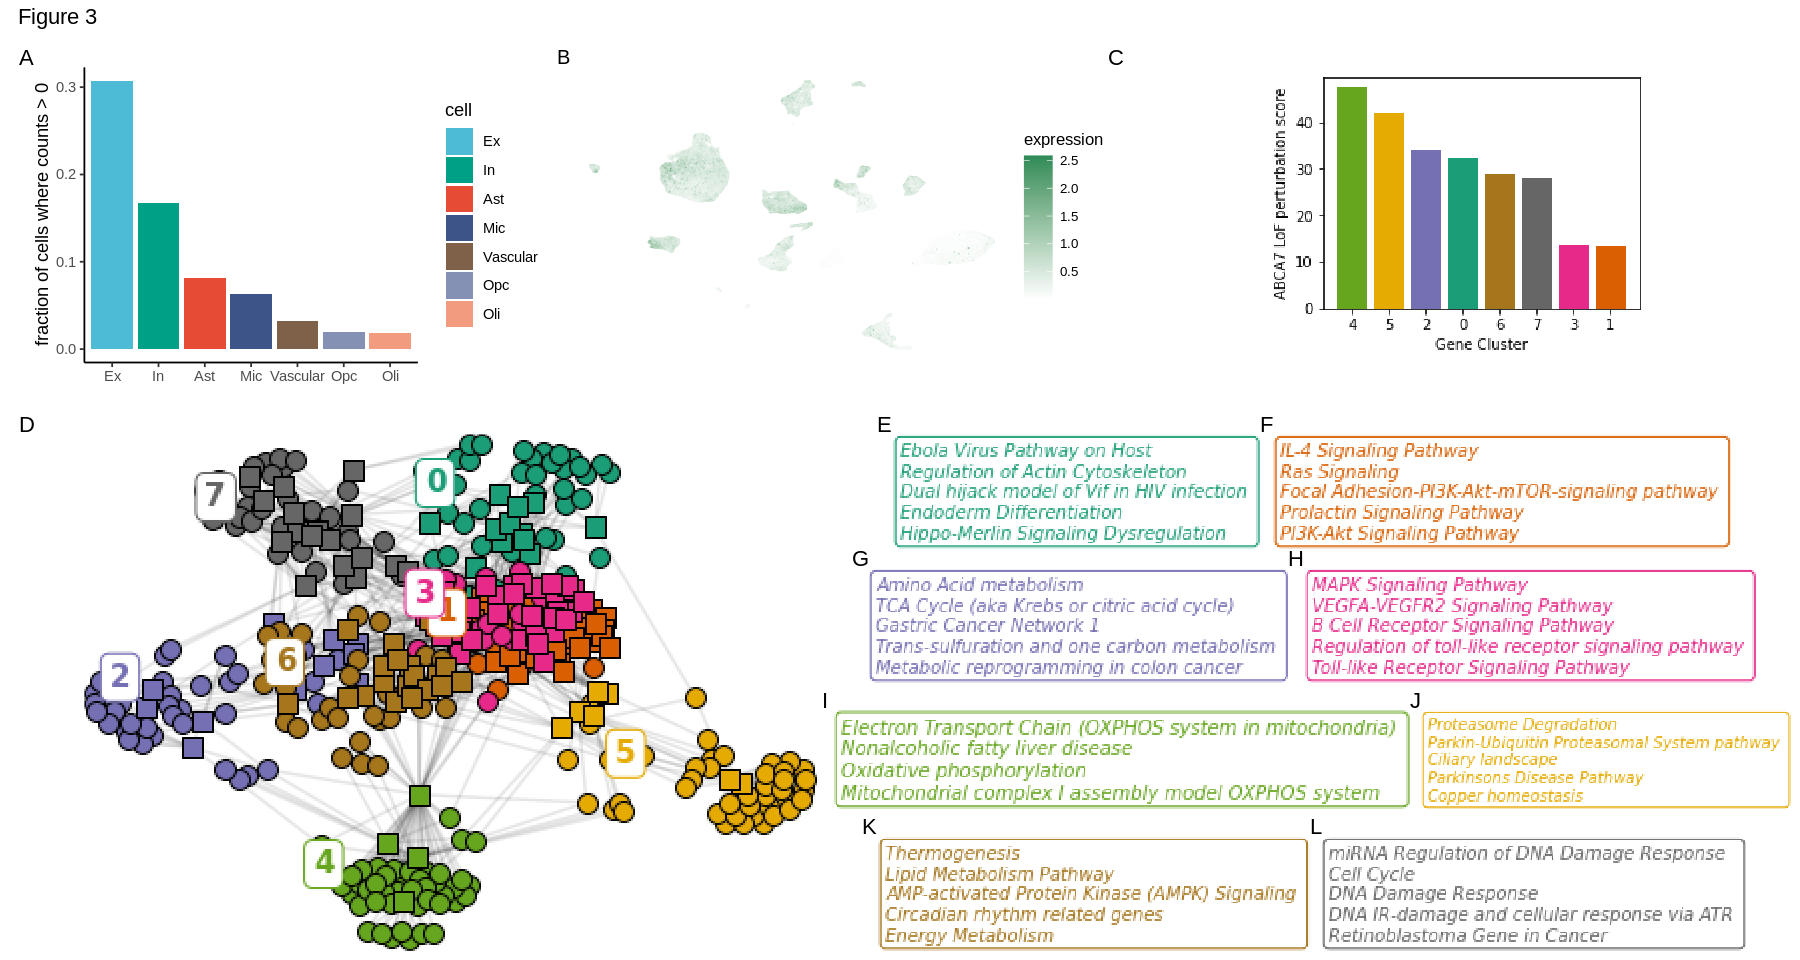

In [548]:
options(repr.plot.width=15, repr.plot.height=8)

fig3 = (((p|abca7_expression|bars)+plot_layout(widths=c(1.5,2,3)))/(clusters | row)) + plot_layout(heights=c(2,3.5))+ plot_annotation(tag_levels = 'A', title='Figure 3')
fig3 

pdf('./pdf_figures/Figure_3.pdf', width=18, height=10)
fig3
dev.off()

<u>**Figure 4**</u>
<a name="F3"></a>

In [497]:
clust = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust4_ex.png')))
genes = image_ggplot(image_trim(image_read('./pdf_figures/4_genes.png')))
bars = image_ggplot(image_trim(image_read('./pdf_figures/bars4.png')))
gene = image_ggplot((image_trim(image_read('./pdf_figures/ABCA7_genemap.png'))))
overview = image_ggplot((image_trim(image_read('./pdf_figures/viralNGN2differentiation_Shannon.png'))))

In [498]:
mito_in = image_ggplot(image_trim(image_read('./pdf_figures/mitohealth_iN.png')))
ox_in = image_ggplot(image_trim(image_read('./pdf_figures/cellrox_iN.png')))


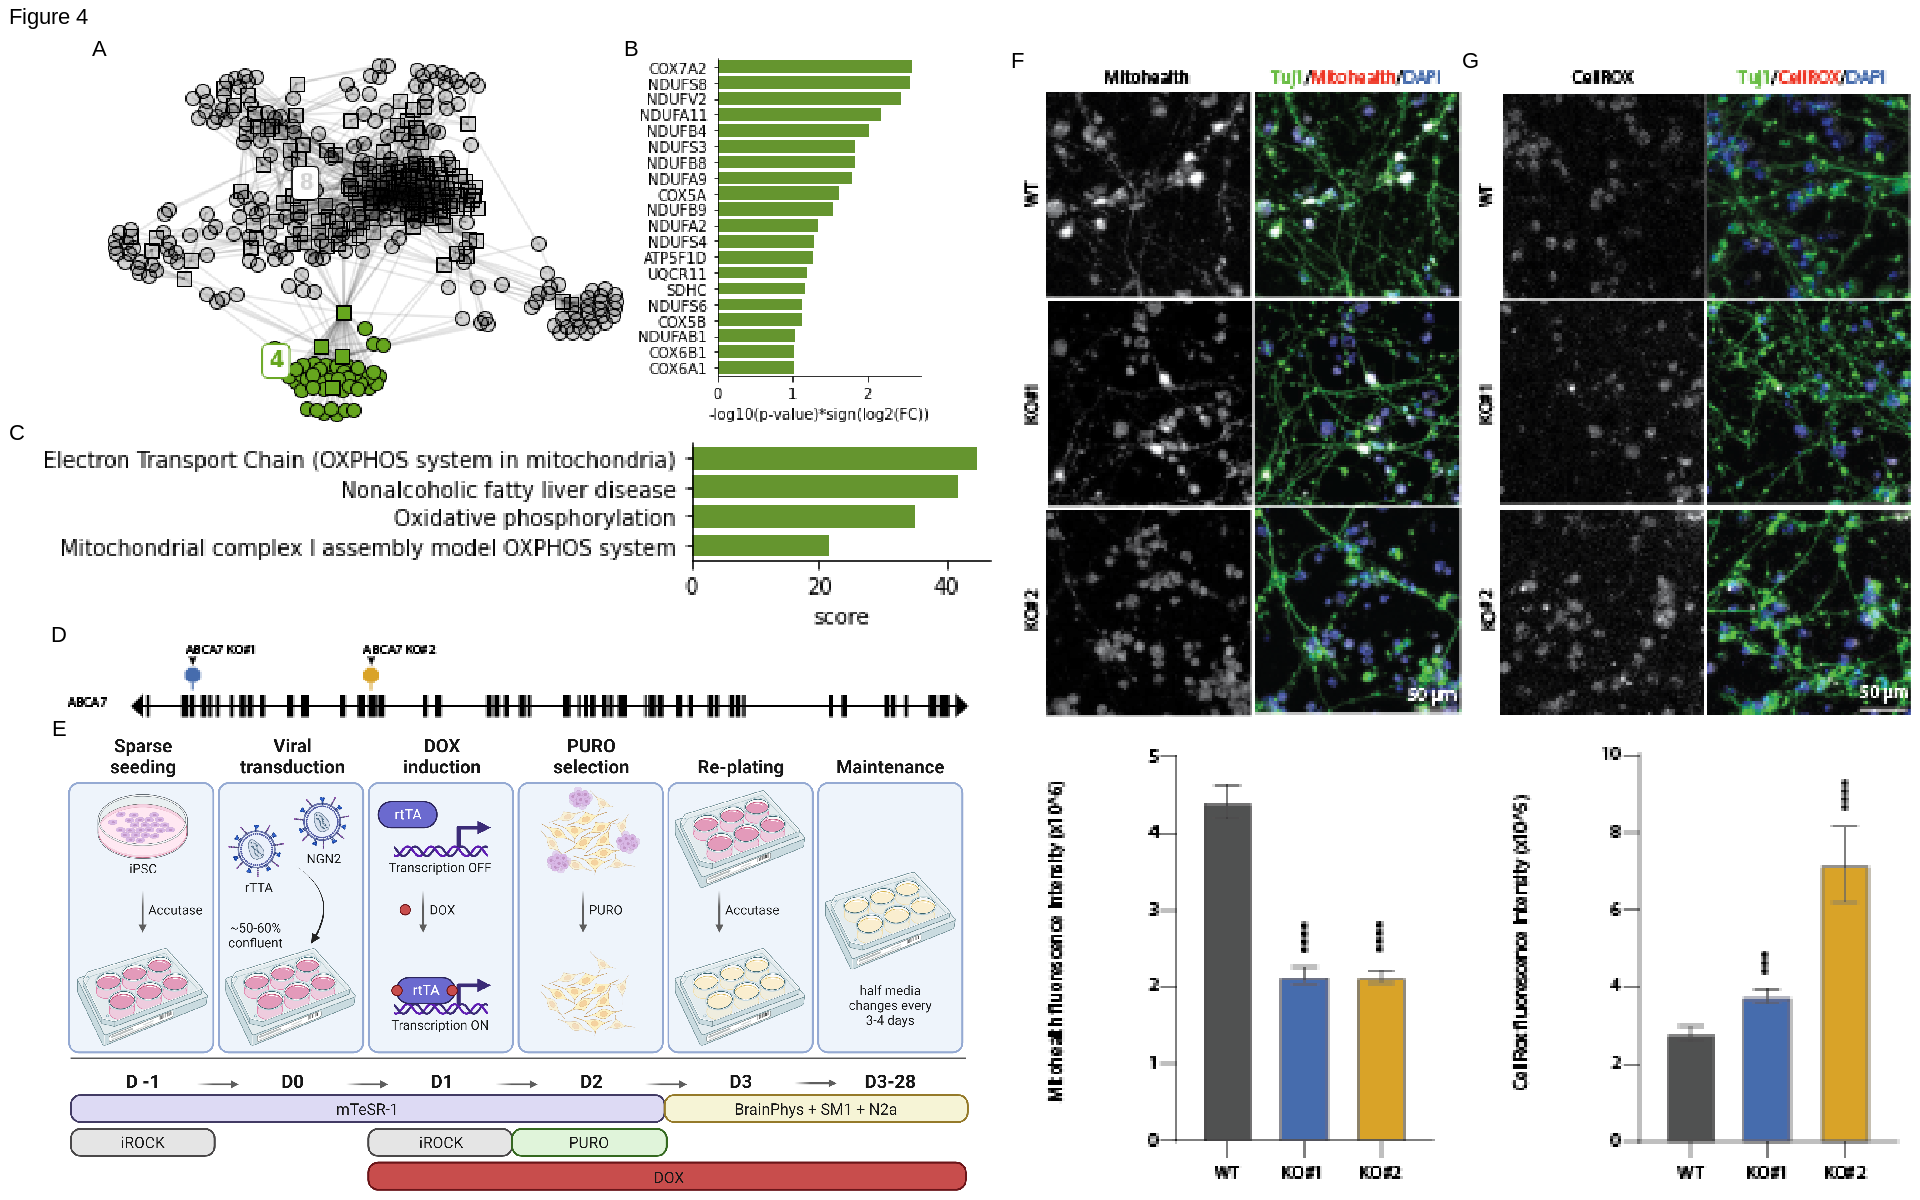

In [539]:
options(repr.plot.width=16, repr.plot.height=10)

fig4 = (((clust | genes)/ bars))/(gene/overview) + plot_layout(heights=c(2,1,3))
#+ plot_annotation(tag_levels = 'A', title='Figure 4')
fig4 = (fig4|(mito_in|ox_in)) + plot_layout(widths=c(3,2.7))+ plot_annotation(tag_levels = 'A', title='Figure 4')
fig4

In [540]:
pdf('./pdf_figures/Figure_4.pdf', width=16, height=10)
fig4
dev.off()

png 
  2

<u>**Figure 5**</u>
<a name="F4"></a>

In [454]:
clust = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust7_ex.png')))
genes = image_ggplot(image_trim(image_read('./pdf_figures/7_genes.png')))
bars = image_ggplot(image_trim(image_read('./pdf_figures/bars7.png')))

comet_pm = image_ggplot(image_trim(image_read('./pdf_figures/comet_PFC.png')))
comet_ng = image_ggplot(image_trim(image_read('./pdf_figures/comet_iN.png')))



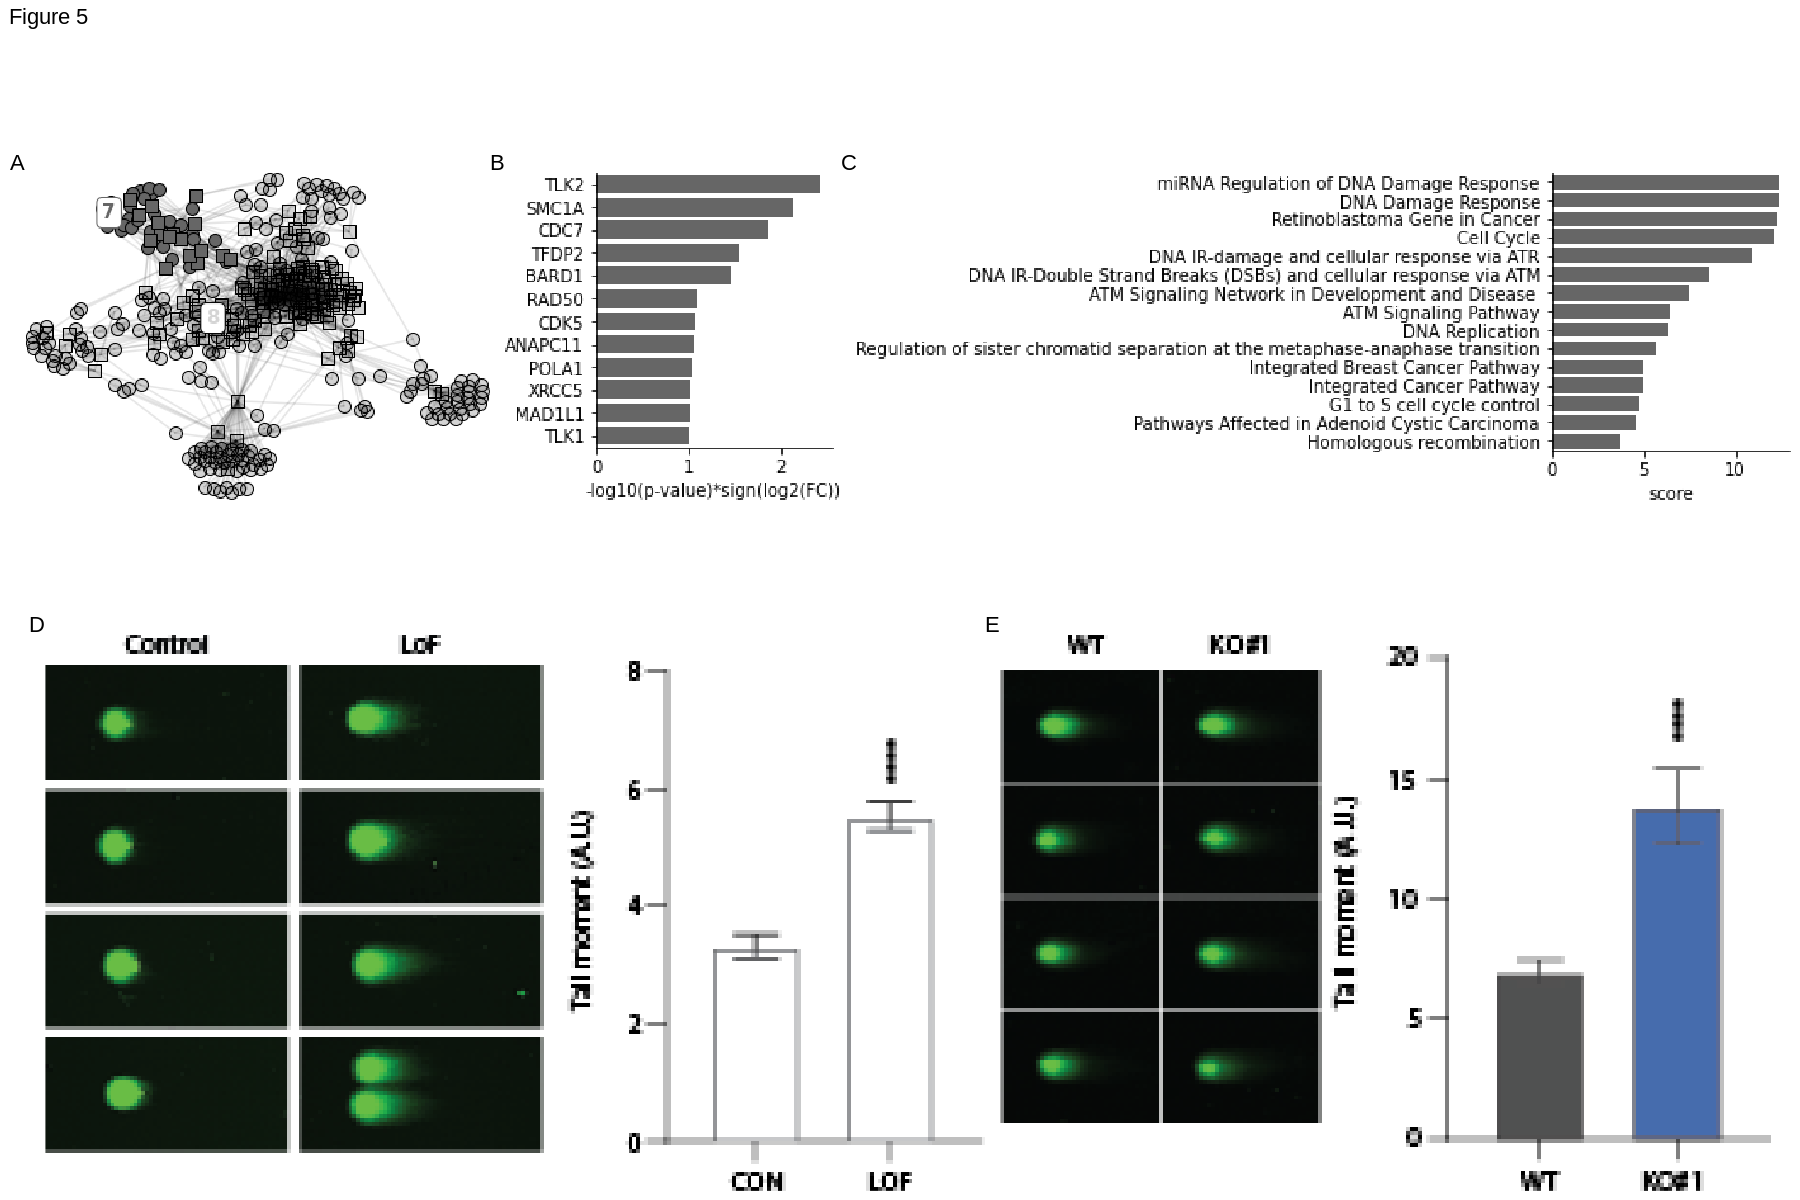

In [455]:
options(repr.plot.width=15, repr.plot.height=10)

fig5 = (((clust | genes |bars)/(comet_pm|comet_ng))) + plot_annotation(tag_levels = 'A', title='Figure 5')
fig5

In [456]:
pdf('./pdf_figures/Figure_5.pdf', width=15, height=10)
fig5
dev.off()

png 
  2

<u>**Figure 6**</u>
<a name="F5"></a>

In [451]:
clust = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust3_ex.png')))
genes = image_ggplot(image_trim(image_read('./pdf_figures/3_genes.png')))
bars = image_ggplot(image_trim(image_read('./pdf_figures/bars3.png')))

p65_pm = image_ggplot(image_trim(image_read('./pdf_figures/p65_PFC.png')))
p65_ng = image_ggplot(image_trim(image_read('../ABCA7lof//svgs/ngn2_p65.pdf')))


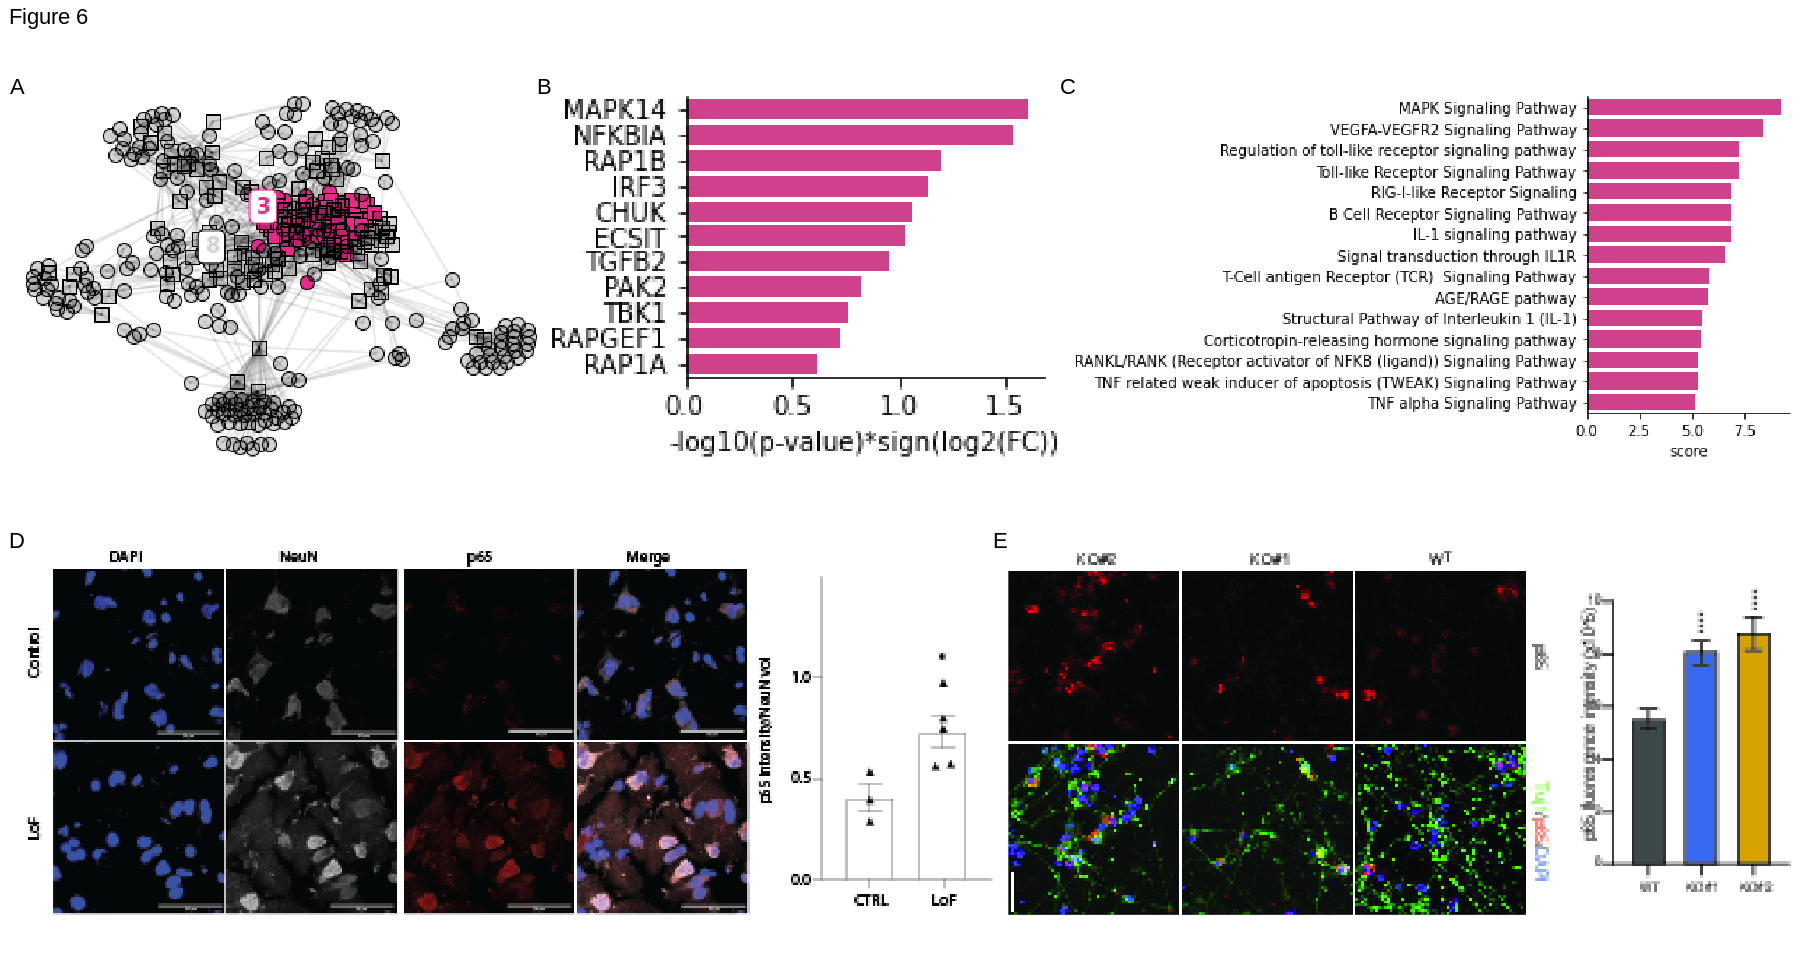

In [452]:
options(repr.plot.width=15, repr.plot.height=8)

fig6 = ((clust | genes |bars)/(p65_pm|p65_ng))+ plot_annotation(tag_levels = 'A', title='Figure 6')
fig6

In [453]:
pdf('./pdf_figures/Figure_6.pdf', width=15, height=8)
fig6
dev.off()

png 
  2

<u>**Figure 7**</u>
<a name="F6"></a>

In [178]:
library(patchwork)
library(ggplot2)
library(magick)
library(tidytext)
library(SingleCellExperiment)
library(tidyHeatmap)
library(dplyr)
library(tidyr)
library(plotgardener)
library(ggplot2)
library(ggrepel)
library(ggsci)
library(reshape2)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [428]:
clust = image_ggplot(image_trim(image_read('./pdf_figures/LE_clust6_ex.png')))
genes = image_ggplot(image_trim(image_read('./pdf_figures/6_genes.png')))
bars = image_ggplot(image_trim(image_read('./pdf_figures/bars6.png')))


In [429]:
data = readRDS('../ABCA7lof//processed_data/for_plotting/lipidomics.rds')
key = read.csv('../ABCA7lof//raw_data/ngn2_data/lipidkey.csv', sep = '\t')
key = key[!duplicated(key$Key),]
rownames(key) = key$Key

C = unique(key$Class)
class_cols = pal_cosmic()(length(C))
names(class_cols) = C

In [430]:
draw_lipid_heatmap = function(d, N, lfc_cut, pval_cut, p, mat, show_heatmap_legend, i){
    
    d1 = d%>%group_by(class, variable)%>%top_n(-N, score)%>%filter(logfc< -1*lfc_cut, pvals<pval_cut)%>%ungroup(.)#%>%filter(class%in%c('Neutral lipids', 'Phospholipids', 'Sphingolipids'))
    d2 = d%>%group_by(class, variable)%>%top_n(N, score)%>%filter(logfc> lfc_cut, pvals<pval_cut)%>%ungroup(.)#%>%filter(class%in%c('Neutral lipids', 'Phospholipids', 'Sphingolipids'))
    d = rbind(d1,d2)%>%arrange(class)
    
    mat = mat[rownames(mat)%in%d$name,]
    cluster_cols = hclust(dist(scale(t(mat[,]))))
    
    cluster_rows = hclust(dist(t(scale(t(mat[,])))))
    
    if (unname(unlist(unique(d[d$variable==cluster_cols$labels[1],'genotype'])))!=i){
        cluster_cols = rev(cluster_cols)
    }

    if (unname(unlist(unique(d[d$name==cluster_rows$labels[cluster_rows$order][1],'logfc'])))<0){
        cluster_rows = rev(cluster_rows)
    }
    
    h1 = d %>% #group_by(class)%>%
    tidyHeatmap::heatmap(
        column_title='',
        row_title='',
     .row = lipid_name,
     .column = variable,
     .value = value, show_column_names=FALSE,
     scale = "row",show_heatmap_legend =show_heatmap_legend, show_row_dend = TRUE,
    palette_value = circlize::colorRamp2(
            seq(-3, 3, length.out = 11), 
            rev(RColorBrewer::brewer.pal(11, "RdBu"))), 
        cluster_columns=cluster_cols, cluster_rows=cluster_rows) %>%
    #add_tile(class, palette = p, show_legend = FALSE, show_annotation_name=FALSE)%>%
    add_tile(genotype, palette = c('grey', 'red'), show_legend = show_heatmap_legend,  show_annotation_name=FALSE)%>%
    wrap_heatmap()

    return(h1)
}

plot_volcano = function(sce, ratio_name, pval_name, lab, pval_cut, lfc_cut, adjust, annotation1, class_cols){
    cols = c('brown1', 'chocolate', 'red')
    names(cols) = c('down', 'other', 'up')
    temp = as.data.frame(rowData(sce)[,c(ratio_name, pval_name, annotation1)])
    colnames(temp) = c('log2', 'pvalue', 'label')
    if(adjust){
        temp$pvalue = p.adjust(temp$pvalue, 'fdr')
    }
    temp$direction = ifelse(temp$log2>lfc_cut & temp$pvalue<pval_cut, 'up', ifelse(temp$log2< -1*lfc_cut & temp$pvalue<pval_cut, 'down', 'other'))
    temp$label2 = ifelse(temp$direction!='other' & temp$label%in%lab, temp$label,'')
    p = ggplot(temp, aes(x=log2, y= -log10(pvalue), col=label, label = label2))+ geom_text_repel(max.overlaps = Inf, size = 3.5)+  scale_color_manual(values = class_cols) + geom_point(aes(alpha = 0.01), size = 2, show.legend = FALSE)+theme_classic() +   theme(text = element_text(size=10),strip.background = element_blank(),strip.placement = "outside" ,strip.text.y = element_text(size = 10, color = "black"))+ theme(legend.position='none')#+ #facet_wrap(~label, ncol = 7, scales = "free_x")
    return(p+xlab('log2(fold change)')+ylab('-log10(p-value)'))
}

In [431]:
options(repr.plot.width=7, repr.plot.height=9)

d = counts(data$ngn2_all)
d = d[,colData(data$ngn2_all)$treatment!='Choline']
mat = d
d$name = rownames(d)
d = melt(d, id = 'name')
d = cbind(d, rowData(data$ngn2_all)[d$name,c('logfc_both_batch', 'pvals_both_batch', 'lipid.class', 'total_length', 'total_unsaturation', 'lipid.fattyacid')])
d$genotype = colData(data$ngn2_all)[as.character(d$variable),'Genotype']
d$treatment = colData(data$ngn2_all)[as.character(d$variable),'treatment']

d$class = key[d$lipid.class,'Class']
#d = na.omit(d[d$treatment!='Choline' ,])
d$score = sign(d$logfc_both_batch) * -log10(d$pvals_both_batch)
colnames(d) = c('name', 'variable', 'value', 'logfc', 'pvals', 'lipid.class','length', 'saturation', 'lipid.fattyacid', 'genotype', 'treatment', 'class', 'score')

d$lipid_name = paste0(d$lipid.class, ' ',d$lipid.fattyacid)

d = d%>%group_by(variable)%>%distinct(lipid_name,.keep_all = TRUE)%>%ungroup
#paste0( d$lipid.class, ' ', '[',d$length, ':', d$saturation, ']')

p = c('yellow', 'white','blue')

h2 = draw_lipid_heatmap(d, 10, 1.5, 0.005, p, mat, show_heatmap_legend=FALSE, i = 'ABCA7 LoF')

# second dataset 

d = counts(data$pm_all)
mat = d

d$name = rownames(d)
d = melt(d, id = 'name')
d = cbind(d, rowData(data$pm_all)[d$name,c('stats.log2', 'stats.pvalue', 'lipid.key', 'total_length', 'total_unsaturation', 'lipid.fattyacid')])
d$genotype = colData(data$pm_all)[as.character(d$variable),'LOF_status']
d$genotype = ifelse(d$genotype=='CON', 'Control', 'ABCA7 LoF')

d$class = key[d$lipid.key,'Class']
d$score = sign(d$stats.log2) * -log10(d$stats.pvalue)
colnames(d) = c('name', 'variable', 'value', 'logfc', 'pvals', 'lipid.class', 'length', 'saturation', 'lipid.fattyacid', 'genotype', 'class', 'score')
d$lipid_name = paste0( d$lipid.class, ' ',d$lipid.fattyacid)
d = d%>%group_by(variable)%>%distinct(lipid_name,.keep_all = TRUE)%>%ungroup

p = c('blue', 'yellow', 'white', 'white', 'white', 'black') # need to order these manually:
h1 = draw_lipid_heatmap(d, 10, 0.5, 0.1, p, mat, show_heatmap_legend=TRUE, i = 'Control')

h1 = h1 +ggtitle('Post-mortem Human Brain')+theme(plot.title = element_text(size = 13, face = "bold", hjust=.5))
h2 = h2 +ggtitle('iPSC Neurons')+theme(plot.title = element_text(size = 13, face = "bold", hjust=.5))

# volcano plots
v1 = plot_volcano(data$pm_all[rowData(data$pm_all)$lipid.key%in%c('PC', 'TG', 'Cer'),], 'stats.log2', 'stats.pvalue', c('TG', 'PC','Cer'), 0.1, 0.5, FALSE, 'lipid.key', class_cols)
v2 = plot_volcano(data$ngn2_all[rowData(data$ngn2_all)$lipid.class%in%c('PC', 'TG', 'Cer'),], 'logfc_both_batch', 'pvals_both_batch', c('TG', 'PC', 'Cer'), 0.05, 2, FALSE, 'lipid.class', class_cols)

In [432]:
v1a = plot_volcano(data$pm_all[rowData(data$pm_all)$lipid.key%in%c('PC'),], 'stats.log2', 'stats.pvalue', c( 'PC'), 0.1, 0.5, FALSE, 'lipid.key', c('brown1'))
v1b = plot_volcano(data$pm_all[rowData(data$pm_all)$lipid.key%in%c('TG'),], 'stats.log2', 'stats.pvalue', c('TG'), 0.1, 0.5, FALSE, 'lipid.key', c('chocolate'))
v2a = plot_volcano(data$ngn2_all[rowData(data$ngn2_all)$lipid.class%in%c('PC'),], 'logfc_both_batch', 'pvals_both_batch', c('PC'), 0.05, 2, FALSE, 'lipid.class', c('brown1'))
v2b = plot_volcano(data$ngn2_all[rowData(data$ngn2_all)$lipid.class%in%c('TG'),], 'logfc_both_batch', 'pvals_both_batch', c('TG'), 0.05, 2, FALSE, 'lipid.class', c('chocolate'))
v1a = v1a +ggtitle('Phosphatidylcholines\n[PFC]')+theme(plot.title = element_text(size = 13,  hjust=.5))
v1b = v1b +ggtitle('Triglycerides\n[PFC]')+theme(plot.title = element_text(size = 13,  hjust=.5))
v2a = v2a +ggtitle('Phosphatidylcholines\n[NGN2]')+theme(plot.title = element_text(size = 13, hjust=.5))
v2b = v2b +ggtitle('Triglycerides\n[NGN2]')+theme(plot.title = element_text(size = 13, hjust=.5))

In [433]:
data = readRDS('../ABCA7lof//processed_data/for_plotting/lipidomics.rds')

sce = data$ngn2_all
sce = sce[,sce$treatment!='Choline']

pca_res <- prcomp(counts(sce), scale. = TRUE)

temp = as.data.frame(pca_res$rotation)
temp$genotype = colData(sce)[rownames(temp),'Genotype']
temp$treatment = colData(sce)[rownames(temp),'treatment']

pc1 = summary(pca_res)$importance['Proportion of Variance',]['PC1']
pc2 = summary(pca_res)$importance['Proportion of Variance',]['PC2']

p1 = ggplot(temp, aes(x=PC1, y=PC2)) +
  geom_point(aes(fill=genotype), shape=21, size=5, stroke=1) + theme_classic() + 
scale_fill_manual(values = c('red', 'grey')) + xlab(paste0('PC1: ', round(pc1, 2), '%')) + ylab(paste0('PC2: ', round(pc2, 2), '%'))

meta = rowData(sce)
meta$class = key[meta$lipid.class,'Class']

meta$change = ifelse(meta$pvals_both_batch<0.005 & meta$logfc_both_batch>0, 'up', 
       ifelse(meta$pvals_both_batch<0.005 & meta$logfc_both_batch<0, 'down', 'unchanged'))

# have to figure out the NA values
meta$change = factor(meta$change, levels = (c('up', 'down', 'unchanged')))
meta = na.omit(as.data.frame(meta))
x = colSums(table(meta$change, meta$class)[1:2,])

meta$class = factor(meta$class, levels = (names(x[order(x)])))
p4 = ggplot(meta, aes(x=class, fill=change), color='black') + scale_fill_manual(values = c('orange', 'blue', 'white')) + geom_bar(position = "fill", color='black') + theme_classic() + ylab('proportion') + xlab('') + theme(axis.text.x=element_text(angle=45, hjust=1))


In [434]:
sce = data$pm_all

meta = rowData(sce)
meta$class = key[meta$lipid.class,'Class']

meta$change = ifelse(meta$stats.pvalue<0.1 & meta$stats.log2>0, 'up', 
       ifelse(meta$stats.pvalue<0.1 & meta$stats.log2<0, 'down', 'unchanged'))


In [246]:
# sce = data$pm_all

# meta = as.data.frame(rowData(sce))
# meta$class = key[meta$lipid.class,'Class']

# meta$change = ifelse(meta$stats.pvalue<0.01 & meta$stats.log2>0, 'up', 
#        ifelse(meta$stats.pvalue<0.01 & meta$stats.log2<0, 'down', 'unchanged'))

# # have to figure out the NA values
# meta$change = factor(meta$change, levels = (c('up', 'down', 'unchanged')))
# #meta = na.omit(as.data.frame(meta))
# x = colSums(table(meta$change, meta$class)[1:2,])

# meta$class = factor(meta$class, levels = (names(x[order(x)])))

# p6 = ggplot(meta, aes(x=class, fill=change), color='black') + scale_fill_manual(values = c('orange', 'blue', 'white')) + geom_bar(position = "fill", color='black') + theme_classic() + ylab('proportion') + xlab('') + theme(axis.text.x=element_text(angle=45, hjust=1))
# p6

Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


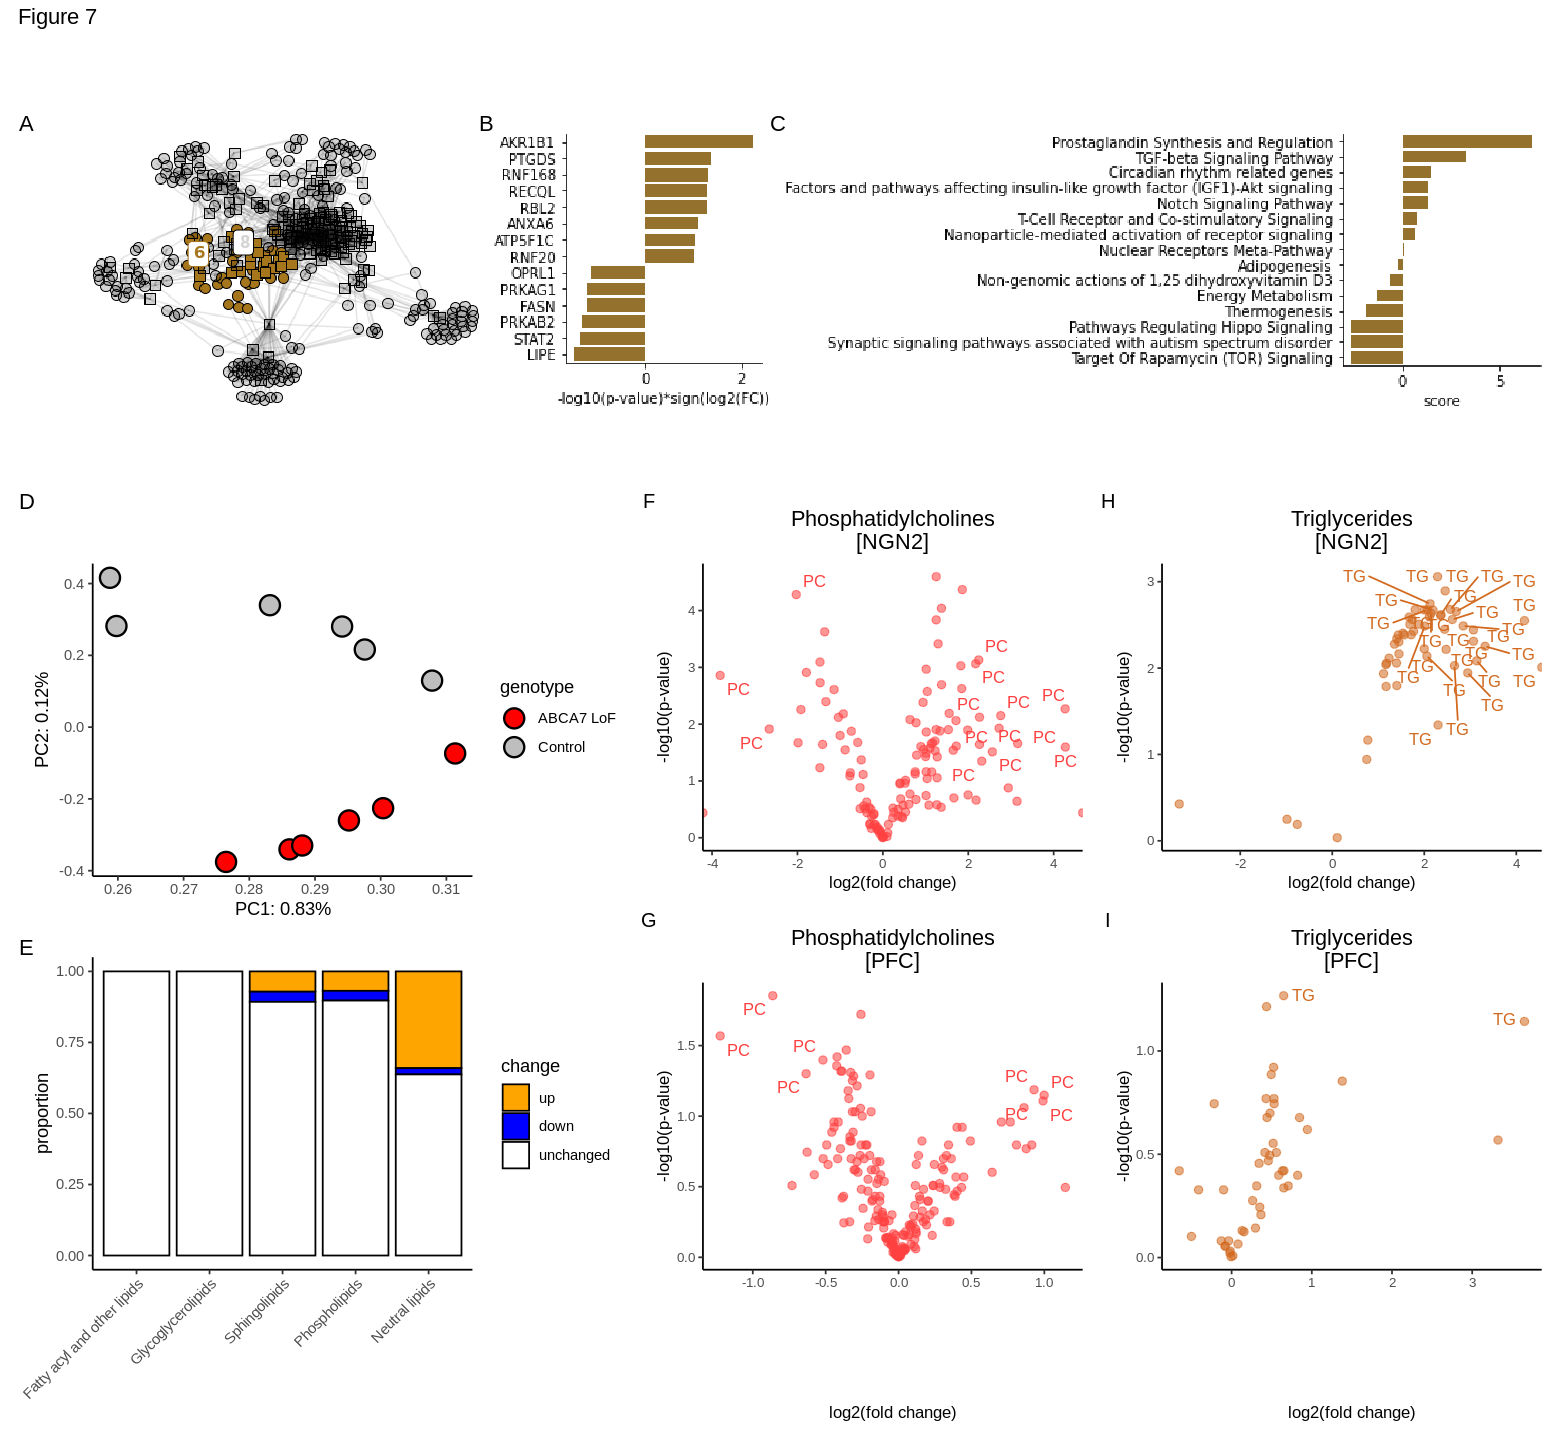

In [448]:
options(repr.plot.width=13, repr.plot.height=12)

fig7 = (clust|genes|bars)/(( (p1/p4) | (v2a / v1a) | (v2b / v1b))) +plot_layout(heights=c(3,5))+ plot_annotation(tag_levels = 'A', title='Figure 7')
fig7

In [450]:
pdf('./pdf_figures/Figure_7.pdf', width=13, height=12)
fig7
dev.off()

Warning message:
“Removed 1 rows containing missing values (`geom_text_repel()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


png 
  2